In [5]:
import pandas as pd

In [6]:
#Importing Libraries
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import json
from collections import Counter
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
consumer_key= 'Consumer Key'
consumer_secret= 'Consumer Secret key'
access_token= 'Access Token'
access_token_secret= 'Access Token Secret'

In [8]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
#Defining Search keyword and number of tweets and searching tweets
query = 'covid-19'
max_tweets = 2000
searched_tweets = [status for status in tweepy.Cursor(api.search, q=query,geocode="12.972442,77.580643,100km").items(max_tweets)]

Total Positive =  577
Total Negative =  573
Total Neutral =  850


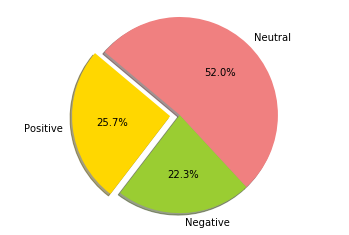

In [10]:
#Sentiment Analysis Report
#Finding sentiment analysis (+ve, -ve and neutral)
pos = 0
neg = 0
neu = 0
for tweet in searched_tweets:
    analysis = TextBlob(tweet.text)
    if analysis.sentiment[0]>0:
       pos = pos +1
    elif analysis.sentiment[0]<0:
       neg = neg + 1
    else:
       neu = neu + 1
print("Total Positive = ", pos)
print("Total Negative = ", neg)
print("Total Neutral = ", neu)

#Plotting sentiments
labels = 'Positive', 'Negative', 'Neutral'
sizes = [257, 223, 520]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [11]:
#Creating Dataframe of Tweets
#Cleaning searched tweets and converting into Dataframe
my_list_of_dicts = []
for each_json_tweet in searched_tweets:
    my_list_of_dicts.append(each_json_tweet._json)

    
with open('tweet_json_Data.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

        
my_demo_list = []
with open('tweet_json_Data.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        text = each_dictionary['text']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                            })
        
        tweet_dataset = pd.DataFrame(my_demo_list, columns = 
                                  ['tweet_id', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at'])

 #Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('tweet_data_region_bangalore.csv')

In [12]:
tweet_dataset

,tweet_id,text,favorite_count,retweet_count,created_at
0,1287438186575097856,RT @Connect_IISc: How can AI help in the fight...,0,12,Sun Jul 26 17:22:37 +0000 2020
1,1287438129842892800,RT @VinayarajAC: When the COVID-19 cases were ...,0,714,Sun Jul 26 17:22:24 +0000 2020
2,1287438025421549569,RT @Connect_IISc: An indigenous #vaccine. Anti...,0,14,Sun Jul 26 17:21:59 +0000 2020
3,1287437839144230912,RT @v_sanjai: #COVID__19 paranoia.\n#tiktoktwe...,0,2,Sun Jul 26 17:21:14 +0000 2020
4,1287437744944189440,RT @SashikumaarG: COVID-19: Summary and Outloo...,0,3,Sun Jul 26 17:20:52 +0000 2020
5,1287437664828841985,Kids and COVID-19: Covid-19 triggers Kawasaki ...,0,0,Sun Jul 26 17:20:33 +0000 2020
6,1287437536164327426,RT @BBMPCOMM: BBMP Covid-19 War Room Bulletin ...,0,2,Sun Jul 26 17:20:02 +0000 2020
7,1287437457714077696,RT @smsssanjaynpc: Last chance to Register\nE-...,0,26,Sun Jul 26 17:19:44 +0000 2020
8,1287436948840132610,RT @oneindiaHindi: बेंगलुरु में दवा और स्टाफ क...,0,2,Sun Jul 26 17:17:42 +0000 2020
9,1287436760830496768,There must be more transparency in use of PM C...,0,0,Sun Jul 26 17:16:57 +0000 2020


In [13]:
tweet_dataset.shape

(2000, 5)

In [14]:
tweet_dataset.head()

,tweet_id,text,favorite_count,retweet_count,created_at
0,1287438186575097856,RT @Connect_IISc: How can AI help in the fight...,0,12,Sun Jul 26 17:22:37 +0000 2020
1,1287438129842892800,RT @VinayarajAC: When the COVID-19 cases were ...,0,714,Sun Jul 26 17:22:24 +0000 2020
2,1287438025421549569,RT @Connect_IISc: An indigenous #vaccine. Anti...,0,14,Sun Jul 26 17:21:59 +0000 2020
3,1287437839144230912,RT @v_sanjai: #COVID__19 paranoia.\n#tiktoktwe...,0,2,Sun Jul 26 17:21:14 +0000 2020
4,1287437744944189440,RT @SashikumaarG: COVID-19: Summary and Outloo...,0,3,Sun Jul 26 17:20:52 +0000 2020


In [15]:
#Cleaning Data
#Removing @ handle
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
     
    return input_txt 

tweet_dataset['text'] = np.vectorize(remove_pattern)(tweet_dataset['text'], "@[\w]*")

tweet_dataset.head()

,tweet_id,text,favorite_count,retweet_count,created_at
0,1287438186575097856,RT : How can AI help in the fight against COVI...,0,12,Sun Jul 26 17:22:37 +0000 2020
1,1287438129842892800,RT : When the COVID-19 cases were reporting le...,0,714,Sun Jul 26 17:22:24 +0000 2020
2,1287438025421549569,RT : An indigenous #vaccine. Antibody testing ...,0,14,Sun Jul 26 17:21:59 +0000 2020
3,1287437839144230912,RT : #COVID__19 paranoia.\n#tiktoktweets #pand...,0,2,Sun Jul 26 17:21:14 +0000 2020
4,1287437744944189440,RT : COVID-19: Summary and Outlook based on ou...,0,3,Sun Jul 26 17:20:52 +0000 2020


In [16]:
tweet_dataset['text'].head()

0    RT : How can AI help in the fight against COVI...
1    RT : When the COVID-19 cases were reporting le...
2    RT : An indigenous #vaccine. Antibody testing ...
3    RT : #COVID__19 paranoia.\n#tiktoktweets #pand...
4    RT : COVID-19: Summary and Outlook based on ou...
Name: text, dtype: object

In [18]:
len(tweet_dataset)

2000

In [19]:
#Cleaning Tweets
corpus = []
for i in range(0, 2000):
    tweet = re.sub('[^a-zA-Z0-9]', ' ', tweet_dataset['text'][i])
    tweet = tweet.lower()
    tweet = re.sub('rt', '', tweet)
    tweet = re.sub('http', '', tweet)
    tweet = re.sub('https', '', tweet)
    tweet = tweet.split()
    lm = WordNetLemmatizer()
    tweet = [lm.lemmatize(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

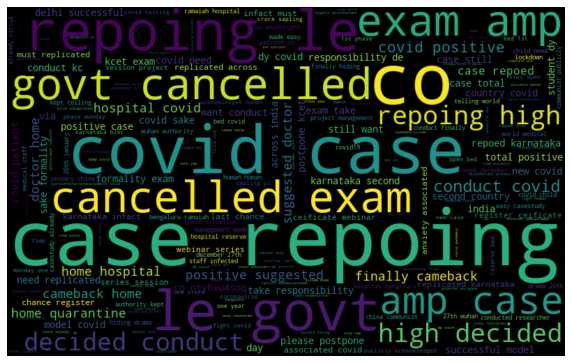

In [20]:
#Visualization
#Word Cloud
all_words = ' '.join([text for text in corpus])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



In [21]:
#Term Freuency - TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(tweet_dataset['text'])
#Count Most Frequent Words
Counter = Counter(corpus)
most_occur = Counter.most_common(10) 
print(most_occur)

[('covid 19 case repoing le govt cancelled exam amp case repoing high decided conduct', 353), ('finally cameback home hospital covid 19 positive suggested doctor home quarantine', 69), ('student dy covid 19 sake formality exam take responsibility de', 36), ('co ntvhxu4soq', 32), ('karnataka second country covid 19 case still want conduct kc', 29), ('delhi successful model covid 19 need replicated karnataka infact must replicated across india', 27), ('19 anxiety associated covid 19 child need', 27), ('last chance register e ceificate webinar series session project management made easy casestudy already circul', 26), ('10 3 week december 27th wuhan authority kept telling world medical staff infected', 26), ('bengaluru m ramaiah hospital reserve 500 bed covid 19 patient co anu3otsgn9', 23)]
